<a href="https://colab.research.google.com/github/Gcango/Projecto_4/blob/main/DadosLab_Consult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A probemática neste projecto consiste em analisar um conjunto de dados que contém informações sobre pacientes,retirados da base de dados da Lab_Consult. Nestes dados referente aos pacientes, icluem informações como características demográficas, detalhes do procedimento médico e o comparecimento ao acompanhamento médico.Com base nestas informações que se possui, a Lab_Consult quer analisar ao fundo para conhece-los da melhor forma e perceber (possíveis) reais motivos que levam diferentes pacientes a não estarem presente nos procedimentos agendados por eles. Com base analise de exploração profunda para conehcer os dados, a Lab_Consult beneficiou-se de um modelo de Machine Learning capaz de prever se um paciente comparecerá ou não ao acompanhamento médico com base em suas características individuais. Este procedimento, poderá ajudar a Lab_Consult a a identificar quais pacientes têm maior probabilidade de não comparecer ao acompanhamento e tomar medidas proativas para garantir que recebam o cuidado adequado. Além disso, a análise da importância das variáveis no modelo pode fornecer insights sobre quais fatores influenciam mais o comparecimento ao acompanhamento, permitindo uma abordagem mais direcionada e eficaz no gerenciamento do cuidado dos pacientes.


In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [124]:
dados = pd.read_csv("/content/Course Challenge Dataset - Scenario 2 - Sheet1.csv")

In [ ]:
#1) - Exploração dos dados retirados a Base de Dados

In [125]:
dados

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes
1,15620,F,Single,Allison,CO,81137,94,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81,Crown,No
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes
...,...,...,...,...,...,...,...,...,...
94,909853,T,Widowed,Allison,CO,81137,78,Extraction,No
95,915871,F,Partnership,Allison,CO,81137,36,Emergency Surgery,Yes
96,923490,M,Single,Allison,CO,81137,38,Extraction,Yes
97,934101,F,Single,Allison,CO,81137,39,Emergency Surgery,Yes


In [126]:
print("O dataset tem linhas: ", dados.shape[0])
print("O dataset tem Colunas: ", dados.shape[1])

O dataset tem linhas:  99
O dataset tem Colunas:  9


In [127]:
dados.columns

Index(['Patient ID', 'Gender', 'Marital Status', 'City', 'State', 'Zip Code',
       'Age', 'Procedure', 'Follow-up Attended?'],
      dtype='object')

In [128]:
dados.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient ID           99 non-null     int64 
 1   Gender               99 non-null     object
 2   Marital Status       99 non-null     object
 3   City                 99 non-null     object
 4   State                99 non-null     object
 5   Zip Code             99 non-null     int64 
 6   Age                  99 non-null     int64 
 7   Procedure            99 non-null     object
 8   Follow-up Attended?  99 non-null     object
dtypes: int64(3), object(6)
memory usage: 38.4 KB


In [129]:
dados.describe()

,Patient ID,Zip Code,Age
count,99.000000,99.0,99.000000
mean,297007.989899,81137.0,62.818182
std,304907.283539,0.0,21.413025
min,11234.000000,81137.0,24.000000
25%,52802.000000,81137.0,43.000000
50%,98812.000000,81137.0,68.000000
75%,534712.500000,81137.0,81.000000
max,936597.000000,81137.0,102.000000


In [130]:
dados.dtypes

Patient ID              int64
Gender                 object
Marital Status         object
City                   object
State                  object
Zip Code                int64
Age                     int64
Procedure              object
Follow-up Attended?    object
dtype: object

In [131]:
dados.head()

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes
1,15620,F,Single,Allison,CO,81137,94,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81,Crown,No
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes


In [132]:
#2) - Distribuição das Idade dos Pacientes

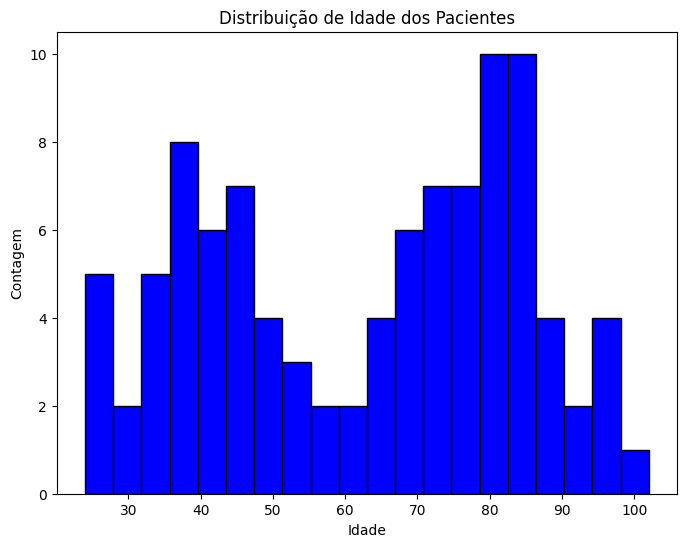

In [133]:
plt.figure(figsize=(8, 6))
plt.hist(dados['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição de Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

In [ ]:
#3) - Média de Idade, Idade Maxima e Idade Mínima dos Pacientes

In [134]:
media_idade = dados['Age'].mean()
idade_max = dados['Age'].max()
idade_min = dados['Age'].min()

In [184]:
print(f"A média de idade dos pacientes é de {media_idade:.2f}")
print("A idade máxima dos pacientes é de:", idade_max)
print("A idade minimo dos pacientes é de:", idade_min)

A média de idade dos pacientes é de 62.82
A idade máxima dos pacientes é de: 102
A idade minimo dos pacientes é de: 24


In [136]:
#4) - Procedimentos Existente na clinica são:

In [137]:
procdmtos = dados["Procedure"].value_counts()

In [138]:
procdmtos

Procedure
Extraction           53
Crown                22
Implant              13
Emergency Surgery    10
Veneers               1
Name: count, dtype: int64

<ipython-input-139-1e8d7f6fe80b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=procdmtos.values, y=procdmtos.index, palette='viridis')


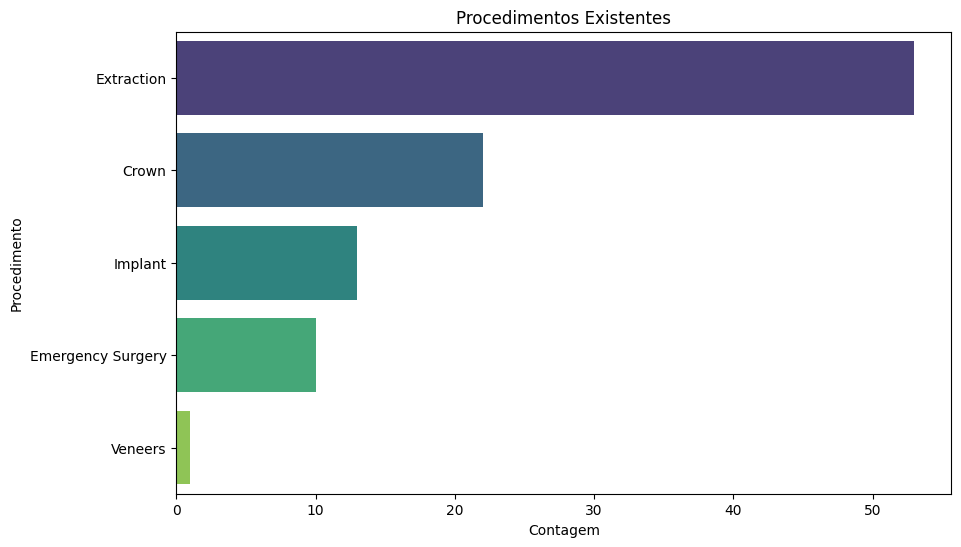

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(x=procdmtos.values, y=procdmtos.index, palette='viridis')
plt.title('Procedimentos Existentes')
plt.xlabel('Contagem')
plt.ylabel('Procedimento')
plt.show();

In [140]:
#5) - Lista dos procedimentos médicos por presença (Yes) ou auscência (No)

In [141]:
procdmtos_falha = dados[["Procedure","Follow-up Attended?"]].value_counts()

In [186]:
print("Listagem dos procedimentos médico por presença e falta:\n", procdmtos_falha)

Listagem dos procedimentos médico por comparecimento:
 Procedure          Follow-up Attended?
Extraction         Yes                    27
                   No                     26
Crown              No                     12
                   Yes                    10
Implant            Yes                     8
Emergency Surgery  Yes                     6
Implant            No                      5
Emergency Surgery  No                      4
Veneers            Yes                     1
Name: count, dtype: int64


In [143]:
#6) - Distribuição dos pacientes por Genero

In [144]:
genero = dados['Gender'].value_counts()

In [188]:
print("Os pacientes estão distribuidos por Genero da seguinte forma:\n",genero)

Os pacientes estão distribuidos por Genero da seguinte forma:
 Gender
F     49
M     42
T      4
NC     3
P      1
Name: count, dtype: int64


In [145]:
#7) - Distribuição dos pacientes por Estado Civil

In [146]:
estado_civil = dados["Marital Status"].value_counts()

In [189]:
print("Os pacientes estão distribuidos por estado civil da seguinte forma:\n",estado_civil)

Os pacientes estão distribuidos por estado civil da seguinte forma:
 Marital Status
Single         27
Married        25
Widowed        21
Divorced       18
Partnership     8
Name: count, dtype: int64


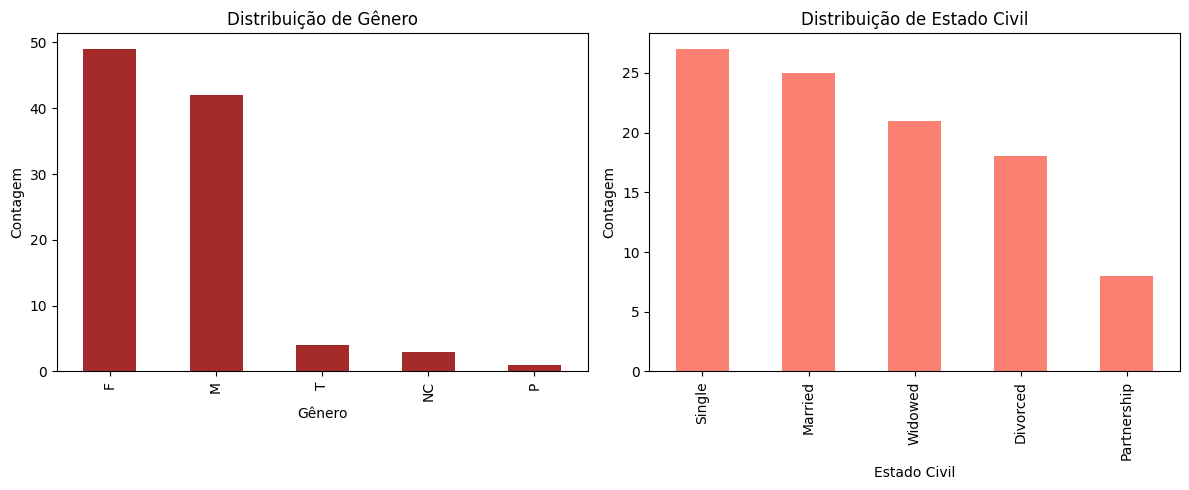

In [148]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
genero.plot(kind='bar', color='brown')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
estado_civil.plot(kind='bar', color='salmon')
plt.title('Distribuição de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [149]:
dados.sample(3)

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
44,85807,F,Divorced,Allison,CO,81137,46,Implant,Yes
58,241715,F,Single,Southern Ute,CO,81137,52,Extraction,Yes
5,26513,F,Partnership,Allison,CO,81137,43,Emergency Surgery,Yes


In [ ]:
#8) - Precença dos pacientes por genero nos procedimentos médicos presença (Yes) ou ausência (No)

In [152]:
freq_proc = dados.groupby(['Follow-up Attended?','Gender'])['Procedure'].count()

In [190]:
print("O número de pacientes por genero presente ou não nos procedimentos médicos são:\n",freq_proc)

O número de pacientes por genero presente ou não nos procedimentos médicos são:
 Follow-up Attended?  Gender
No                   F         24
                     M         17
                     NC         2
                     T          4
Yes                  F         25
                     M         25
                     NC         1
                     P          1
Name: Procedure, dtype: int64


In [ ]:
#9) - Precença dos pacientes por genero e estado civil nos procedimentos médicos presença (Yes) ou ausência (No)

In [192]:
freq_casado = dados.groupby(['Follow-up Attended?','Marital Status'])['Procedure'].count()
print("O número de pacientes por estado civil presente ou não nos procedimentos médicos são:\n",freq_casado)

O número de pacientes por estado civil presente ou não nos procedimentos médicos são:
 Follow-up Attended?  Marital Status
No                   Divorced           7
                     Married           12
                     Partnership        2
                     Single             9
                     Widowed           17
Yes                  Divorced          11
                     Married           13
                     Partnership        6
                     Single            18
                     Widowed            4
Name: Procedure, dtype: int64


In [ ]:
#10) - Listagem aleatório de 50 do paciente idade procedimento médico cidade e presença (Yes) ou ausência (No)

In [195]:
freq = dados.groupby(['Patient ID','Age','Procedure','City'])['Follow-up Attended?'].value_counts()
print("Listagem dos aleatória de 50 pacientes:\n",freq.sample(50))

Listagem dos aleatória de 50 pacientes:
 Patient ID  Age  Procedure          City          Follow-up Attended?
47587       71   Emergency Surgery  Allison       No                     1
21962       45   Extraction         Allison       Yes                    1
708029      84   Extraction         Allison       Yes                    1
39606       69   Extraction         Allison       No                     1
441392      81   Crown              Southern Ute  No                     1
49035       52   Extraction         Southern Ute  No                     1
592579      43   Implant            Allison       Yes                    1
343690      36   Implant            Allison       Yes                    1
441218      44   Veneers            Allison       Yes                    1
915871      36   Emergency Surgery  Allison       Yes                    1
52494       47   Extraction         Allison       No                     1
139014      50   Extraction         Southern Ute  Yes           

In [ ]:
#11) - Listagem aleatória de 50 do paciente com procedimento e a respectiva idade

In [196]:
pacientes = dados.groupby(['Procedure','Patient ID'])['Age'].sum()
print("Listagem dos aleatória de Procedimentos, paciente e idade do pacientes:\n",pacientes.sample(50))

Listagem dos aleatória de 50 pacientes:
 Procedure          Patient ID
Crown              737846        47
Extraction         76242         32
Emergency Surgery  203722        84
                   915871        36
Extraction         195910        96
                   241715        52
                   21962         45
Crown              47060         90
Extraction         840298        57
Crown              483272        64
Extraction         152926        34
                   72264         47
Implant            85807         46
Extraction         94837         54
                   123775        83
                   708029        84
Veneers            441218        44
Extraction         456589        48
                   80514         74
                   71946         75
Crown              56884         38
Extraction         60596         79
                   923490        38
                   936597        27
Crown              44606         51
Emergency Surgery  26513     

In [ ]:
#12) - Listagem aleatória de 50 do paciente com procedimento e o respectivo genero

In [197]:
pacientes = dados.groupby(['Procedure','Patient ID'])['Gender'].sum()
print("Listagem dos aleatória de Procedimentos, paciente e idade do pacientes:\n",pacientes.sample(50))

Listagem dos aleatória de Procedimentos, paciente e idade do pacientes:
 Procedure          Patient ID
Crown              441392        F
Emergency Surgery  55725         F
Extraction         152926        F
Crown              659462        F
Extraction         75350         F
                   936597        M
                   517266        F
Implant            343690        M
Crown              483272        F
                   761156        M
Extraction         98812         M
                   68643         F
Crown              29489         M
Extraction         82530         M
Crown              737846        F
Extraction         563422        M
Crown              75025         F
Implant            85807         F
Extraction         552159        M
Emergency Surgery  47587         M
Extraction         798810        M
                   336825        F
                   15620         F
                   840298        M
                   76242         F
Implant            349

In [ ]:
#13) - Filtragem de todos os dados dos pacientes presentes (Yes) no procedimento médico

In [161]:
dados_yes = dados[dados['Follow-up Attended?'] == 'Yes']
dados_yes

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes
5,26513,F,Partnership,Allison,CO,81137,43,Emergency Surgery,Yes
8,34952,F,Single,Allison,CO,81137,35,Implant,Yes
13,42305,M,Married,Southern Ute,CO,81137,57,Crown,Yes
14,43854,F,Married,Allison,CO,81137,72,Emergency Surgery,Yes
17,46218,M,Single,Allison,CO,81137,72,Extraction,Yes
26,55725,F,Partnership,Southern Ute,CO,81137,34,Emergency Surgery,Yes
27,56884,M,Single,Southern Ute,CO,81137,38,Crown,Yes
28,58912,F,Divorced,Southern Ute,CO,81137,42,Extraction,Yes


In [162]:
#14) - Percentagem dos pacientes presente (Yes) nos procedimentos medico

In [164]:
total_pacientes = len(dados)
total_yes = len(dados_yes)
porcao_yes = total_yes / total_pacientes
print(f"A proporção de pacientes que compareceram ao follow-up é: {porcao_yes:.2%}")

A proporção de pacientes que compareceram ao follow-up é: 52.53%


In [ ]:
#15) - Precensa nos procedimentos por Genero

###**Isso** ***pode levar-nos a inferir que nos pacientes que não faltam a uma igualdade entre os homes e mulhres***.


In [198]:
dados_yes['Gender'].value_counts()

Gender
M     25
F     25
NC     1
P      1
Name: count, dtype: int64

In [164]:
#16) - Filtragem de todos os dados dos pacientes ausentes (No) no procedimento médico

In [165]:
dados_no = dados[dados['Follow-up Attended?'] == 'No']
dados_no

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
1,15620,F,Single,Allison,CO,81137,94,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81,Crown,No
6,29489,M,Married,Allison,CO,81137,85,Crown,No
7,34918,T,Widowed,Allison,CO,81137,81,Extraction,No
9,35329,M,Widowed,Allison,CO,81137,86,Emergency Surgery,No
10,39606,F,Married,Allison,CO,81137,69,Extraction,No
11,40614,NC,Married,Allison,CO,81137,49,Crown,No
12,41371,F,Married,Allison,CO,81137,82,Crown,No
15,43891,F,Widowed,Allison,CO,81137,78,Extraction,No


In [ ]:
#17) - Percentagem dos pacientes ausentes (No) nos procedimentos medico

In [166]:
total_pacientes = len(dados)
total_no = len(dados_no)
porcao_no = total_no / total_pacientes
print(f"A proporção de pacientes que compareceram ao follow-up é: {porcao_no:.2%}")

A proporção de pacientes que compareceram ao follow-up é: 47.47%


Analise a relação entre da variavel presente/ausencia nos procedimentos médicos em relação a variaveis como Genero, Idade. Para tal foi criada uma tabelas de contingência e calcular proporções condicionais:

In [167]:
#18 # Tabela de contingência entre presente/ausencia por gênero

In [199]:
contingencia_genero = pd.crosstab(dados['Follow-up Attended?'], dados['Gender'], normalize='index')
print("Tabela de contingência entre follow-up e gênero:")
print(contingencia_genero)
print("\n")

Tabela de contingência entre follow-up e gênero:
Gender                      F         M        NC         P         T
Follow-up Attended?                                                  
No                   0.510638  0.361702  0.042553  0.000000  0.085106
Yes                  0.480769  0.480769  0.019231  0.019231  0.000000




In [ ]:
#19 # Tabela de contingência entre presente/ausencia por Idade

In [200]:
faixas_etarias = pd.cut(dados['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61-100'])
contingencia_idade = pd.crosstab(dados['Follow-up Attended?'], faixas_etarias, normalize='index')
print("Tabela de contingência entre follow-up e idade:")
print(contingencia_idade)

Tabela de contingência entre follow-up e idade:
Age                     19-30     31-45     46-60    61-100
Follow-up Attended?                                        
No                   0.021277  0.063830  0.085106  0.829787
Yes                  0.117647  0.372549  0.176471  0.333333


In [ ]:
#20) - Tabela de contingência por procedimentos presente/ausencia

In [201]:
contingencia_procedimento = pd.crosstab(dados['Follow-up Attended?'], dados['Procedure'], normalize='index')
print("Tabela de contingência entre follow-up e procedimento:")
print(contingencia_procedimento)

Tabela de contingência entre follow-up e procedimento:
Procedure               Crown  Emergency Surgery  Extraction   Implant  \
Follow-up Attended?                                                      
No                   0.255319           0.085106    0.553191  0.106383   
Yes                  0.192308           0.115385    0.519231  0.153846   

Procedure             Veneers  
Follow-up Attended?            
No                   0.000000  
Yes                  0.019231  



É feita uma analise de cotigencia entre as variaves procedimentos, genero, estado civil e a cidade para perceber o impacto do procedimento sobre as mesmas.
Para tal foi criada uma tabelas de contingência e calcular proporções condicionais:

In [ ]:
#21) - Tabela de contingência entre procedimentos e gênero

In [202]:
contingencia_genero_procedimento = pd.crosstab(dados['Procedure'], dados['Gender'])
print("Distribuição dos procedimentos por gênero:")
print(contingencia_genero_procedimento)

Distribuição dos procedimentos por gênero:
Gender              F   M  NC  P  T
Procedure                          
Crown              13   8   1  0  0
Emergency Surgery   5   5   0  0  0
Extraction         28  22   0  0  3
Implant             3   6   2  1  1
Veneers             0   1   0  0  0


In [168]:
#22) - Tabela de contingência entre procedimentos e estado civil

In [203]:
contingencia_estado_civil_procedimento = pd.crosstab(dados['Procedure'], dados['Marital Status'])
print("Distribuição dos procedimentos por estado civil:")
print(contingencia_estado_civil_procedimento)

Distribuição dos procedimentos por estado civil:
Marital Status     Divorced  Married  Partnership  Single  Widowed
Procedure                                                         
Crown                     3        8            2       4        5
Emergency Surgery         0        2            3       3        2
Extraction               11       13            3      16       10
Implant                   4        2            0       3        4
Veneers                   0        0            0       1        0


In [ ]:
#23) - Tabela de contingência entre procedimentos e cidade

In [205]:
contingencia_cidade_procedimento = pd.crosstab(dados['Procedure'], dados['City'])
print("Distribuição dos procedimentos por cidade:")
print(contingencia_cidade_procedimento)

Distribuição dos procedimentos por cidade:
City               Allison  Southern Ute
Procedure                               
Crown                   15             7
Emergency Surgery        7             3
Extraction              39            14
Implant                 12             1
Veneers                  1             0


In [169]:
#23) - Analise da distribuição dos pacientes por Cidades

In [206]:
cidades_pacientes = dados['City'].value_counts()
print("Os pacientes estão distribuidos da seguinte forma:")
print(cidades_pacientes)

Os pacientes estão distribuidos da seguinte forma:
City
Allison         74
Southern Ute    25
Name: count, dtype: int64


In [ ]:
#24) Em termos percentuais são:

In [209]:
print(f"A proporção de pacientes Moradores da cidade de Allison é de {cidades_pacientes[0]/total_pacientes:.2%}")
print(f"A proporção de pacientes Moradores da Cidade de Southern Ute {cidades_pacientes[1]/total_pacientes:.2%}")

A proporção de pacientes Moradores da cidade de Allison é de 74.75%
A proporção de pacientes Moradores da Cidade de Southern Ute 25.25%


In [ ]:
#25) Listagem dos Pacientes moradores da ALLISON

In [212]:
dados_cidades1 = dados[dados['City'] == 'Allison']
print("Total de moradores de Allison:")
print(dados_cidades1.count()[0])

Total de moradores de Allison:
74


In [ ]:
#26) Quantidade de Moradoes de Allison com presença ou ausentes (Yes/No) nos procedimento médicoListagem dos Pacientes moradores da ALLISON

In [172]:
dados_cidades1["Follow-up Attended?"].value_counts()

Follow-up Attended?
Yes    37
No     37
Name: count, dtype: int64

In [213]:
dados_cidades2 = dados[dados['City'] == 'Southern Ute']
print("Total de moradores de Southern Ute:")
print(dados_cidades2.count()[0])

Total de moradores de Southern Ute:
25


In [ ]:
#27) Quantidade de Moradoes de Allison com presença ou ausentes (Yes/No) nos procedimento médicoListagem dos Pacientes moradores da Southern Ute

In [174]:
dados_cidades2["Follow-up Attended?"].value_counts()

Follow-up Attended?
Yes    15
No     10
Name: count, dtype: int64

In [174]:
#28) Análise de frequência para a variável gênero de acordo com o valor mais comum em gênero

In [215]:
frequencia_genero = dados['Gender'].value_counts()
print("Análise de Frequência para a Variável Gênero:")
#print(frequencia_genero)
print("Valor mais comum em gênero:", frequencia_genero.idxmax())

Análise de Frequência para a Variável Gênero:
Valor mais comum em gênero: F


In [174]:
#29) - Análise de frequência para a variável estado civil  Valor mais comum em estado civil

In [217]:
frequencia_estado_civil = dados['Marital Status'].value_counts()
print("\nAnálise de Frequência para a Variável Estado Civil:")
#print(frequencia_estado_civil)
print("Valor mais comum em estado civil:", frequencia_estado_civil.idxmax())


Análise de Frequência para a Variável Estado Civil:
Valor mais comum em estado civil: Single


In [ ]:
#30) - Análise de frequência para a variável cidade  Valor mais comum em estado civil

In [219]:
frequencia_cidade = dados['City'].value_counts()
print("\nAnálise de Frequência para a Variável Cidade:")
#print(frequencia_cidade)
print("Valor mais comum em cidade:", frequencia_cidade.idxmax())


Análise de Frequência para a Variável Cidade:
Valor mais comum em cidade: Allison


Foi utilizado o conceitos de ML, para realizar a predição de comparecimento ao acompanhamento utilizando algoritmos de Machine Learning. Fez-se também, uma avaliação da importância de cada variável na predição.

In [177]:
#31) - Preparação dos Dados

In [227]:
dadosml = dados

In [228]:
dadosml.head()

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes
1,15620,F,Single,Allison,CO,81137,94,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81,Crown,No
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes


              precision    recall  f1-score   support

          No       0.91      1.00      0.95        10
         Yes       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Matriz de Confusão:
[[10  0]
 [ 1  9]]


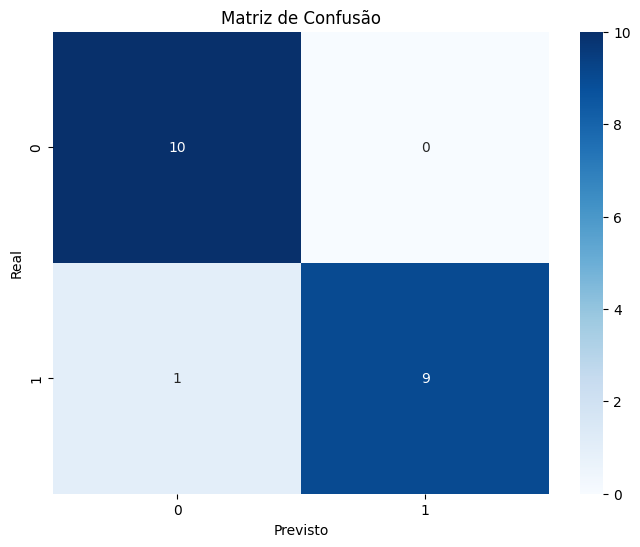

<ipython-input-229-32550c0fb122>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


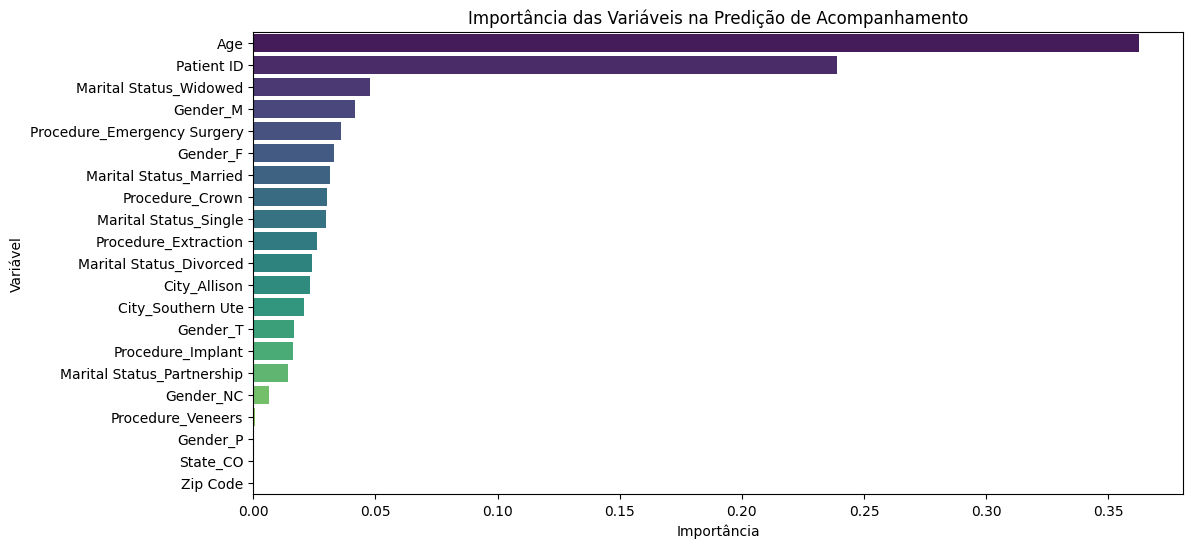

In [229]:

# Remover ou tratar valores ausentes
dadosml.dropna(inplace=True)

# Converter variáveis categóricas em variáveis dummy
dadosml = pd.get_dummies(dadosml, columns=['Gender', 'Marital Status', 'City', 'State', 'Procedure'])

# Definir as variáveis independentes (X) e a variável dependente (y)
X = dadosml.drop(columns=['Follow-up Attended?'])
y = dadosml['Follow-up Attended?']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prever os resultados para o conjunto de teste
predictions = model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, predictions))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, predictions))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Analisar a importância das variáveis
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Importância das Variáveis na Predição de Acompanhamento')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()